In [ ]:
#Set up and Read the data
import pandas as pd
import sqlite3

# read csv file
df_Fact = pd.read_csv('/content/bank.csv')

In [ ]:
# connect to database
conn = sqlite3.connect("Transaction_Bank")
cur = conn.cursor()

In [ ]:
# load CRM data into the bank database
df_Fact.to_sql("Transactions", conn)

1048567

In [ ]:
# CHECK IF DATA INSERTED INTO data/bank
df_Fact1 = pd.read_sql('SELECT * FROM Transactions', conn)
df_Fact1

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...,...
1048562,1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
#Part 1
null_counts = pd.read_sql('''
    SELECT
        SUM(CASE WHEN CustomerDOB IS NULL THEN 1 ELSE 0 END) AS null_dob,
        SUM(CASE WHEN CustGender IS NULL THEN 1 ELSE 0 END) AS null_gender,
        SUM(CASE WHEN CustLocation IS NULL THEN 1 ELSE 0 END) AS null_location,
        SUM(CASE WHEN CustAccountBalance IS NULL THEN 1 ELSE 0 END) AS null_balance
    FROM Transactions
''', conn)

In [ ]:
null_counts

,null_dob,null_gender,null_location,null_balance
0,3397,1100,151,2369


In [ ]:
cur = conn.cursor()
cur.execute('''
    DELETE FROM Transactions
    WHERE CustomerDOB IS NULL
       OR CustLocation IS NULL
       OR CustAccountBalance IS NULL
       OR CustGender IS NULL
''')

conn.commit()

In [ ]:
# You can then check the remaining rows in the table using a SELECT query with pd.read_sql.
remaining_data = pd.read_sql('SELECT * FROM Transactions', conn)
remaining_data

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...,...
1041609,1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
# CHECK IF DATA INSERTED INTO data/bank
df_Fact2 = pd.read_sql('SELECT * FROM Transactions', conn)
df_Fact2

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...,...
1041609,1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# delete gender T

In [ ]:
cur = conn.cursor()
cur.execute('''
    DELETE FROM Transactions
    WHERE CustGender NOT IN ('M', 'F')
''')
conn.commit()

# delete gender T over

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#Distribution of Annnual Income
#plt.figure(figsize=(10, 5))
#sns.set(style = 'whitegrid')
#sns.histplot(df_Fact2['TransactionAmount (INR)'])
#plt.title('Distribution of TransactionAmount (INR)', fontsize = 20)
#plt.xlabel('Range of TransactionAmount (INR)')
#plt.ylabel('Count')

In [ ]:
remaining_data['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,1.041614e+06
mean,1.566096e+03
std,6.561464e+03
min,0.000000e+00
25%,1.600000e+02
50%,4.575000e+02
75%,1.200000e+03
max,1.560035e+06


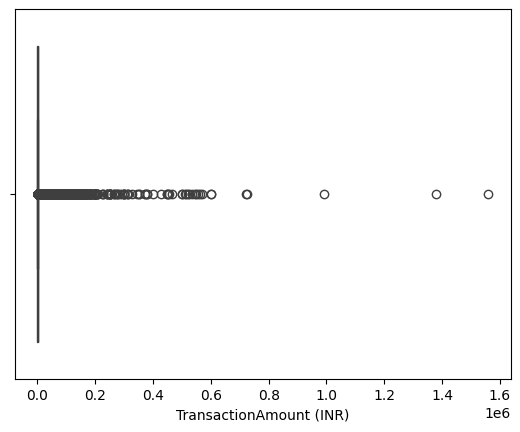

In [ ]:
sns.boxplot(x=remaining_data['TransactionAmount (INR)'])
plt.show()

In [ ]:
#plt.figure(figsize=(10, 5))
#sns.set(style='whitegrid')
#sns.histplot(remaining_data['TransactionAmount (INR)'])

In [ ]:
#Part 2

invalid_txns = pd.read_sql('''
    SELECT COUNT(*) AS invalid_amounts
    FROM Transactions
    WHERE [TransactionAmount (INR)] <= 0
''', conn)


In [ ]:
invalid_txns

,invalid_amounts
0,820


In [ ]:
cur = conn.cursor()
cur.execute('''
    DELETE FROM Transactions
    WHERE "TransactionAmount (INR)" <= 0
''')

In [ ]:
conn.commit()  # Commit the changes to the database
# You can then check the remaining rows in the table using a SELECT query with pd.read_sql.
remaining_data1 = pd.read_sql('SELECT * FROM Transactions', conn)
remaining_data1

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...,...
1040788,1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1040789,1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1040790,1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1040791,1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
#Part 3

# Load DOBs to calculate age in pandas
age_df = pd.read_sql('''
    SELECT TransactionID, CustomerID, CustomerDOB
    FROM Transactions
''', conn)

In [ ]:
from datetime import datetime
import pandas as pd

# Convert CustomerDOB to datetime, setting invalid values to NaT
age_df['CustomerDOB'] = pd.to_datetime(age_df['CustomerDOB'], dayfirst=True, errors='coerce')

# Get the current year
current_year = 2017

# Remove rows with future birth years
age_df = age_df[age_df['CustomerDOB'].dt.year <= current_year]

# Calculate age only for valid past dates
age_df['age'] = age_df['CustomerDOB'].apply(lambda x: current_year - x.year if pd.notnull(x) else None)

# Display results
print(age_df[['CustomerID', 'CustomerDOB', 'age']].head(10))  # Added CustomerDOB to check

<ipython-input-21-7cc893a5f3ea>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  age_df['CustomerDOB'] = pd.to_datetime(age_df['CustomerDOB'], dayfirst=True, errors='coerce')


   CustomerID CustomerDOB  age
0    C5841053  1994-01-10   23
2    C4417068  1996-11-26   21
4    C9031234  1988-03-24   29
6    C7126560  1992-01-26   25
7    C1220223  1982-01-27   35
8    C8536061  1988-04-19   29
9    C6638934  1984-06-22   33
10   C5430833  1982-07-22   35
11   C6939838  1988-07-07   29
12   C6339347  1978-06-13   39


<Axes: xlabel='age', ylabel='Count'>

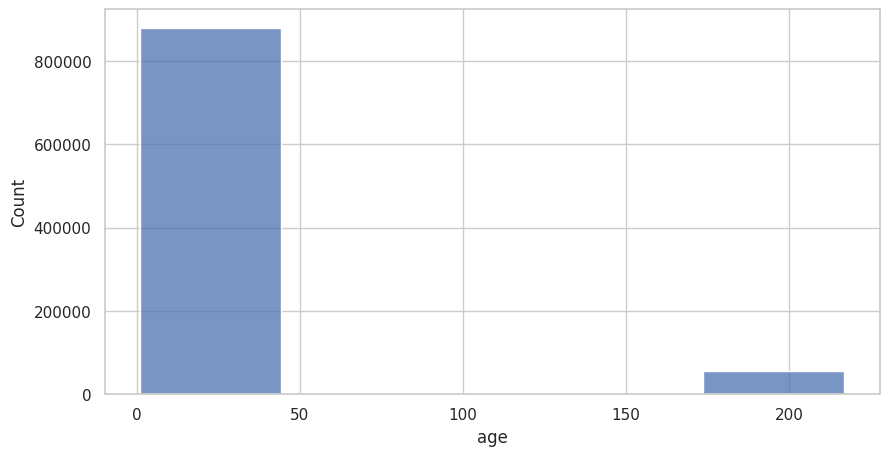

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.histplot(age_df['age'], bins=5)

-----------------------------------------------------------

----------------------------------------------------

In [ ]:
max_age = age_df['age'].max()

print(max_age)

217


In [ ]:
min_age = age_df['age'].min()

print(min_age)

1


In [ ]:
age_df['age'].describe()


,age
count,936040.000000
mean,40.950303
std,44.766376
min,1.000000
25%,26.000000
50%,29.000000
75%,34.000000
max,217.000000


In [ ]:
under_18 = age_df[age_df['age'] <18]

num_under_18 = under_18['CustomerID'].nunique()

print("Number of cust below age 18:", num_under_18)

Number of cust below age 18: 886


In [ ]:
over_100 = age_df[age_df['age'] >100]

num_over_100 = over_100['CustomerID'].nunique()

print("Number of cust above age 100:", num_over_100)

Number of cust above age 100: 55523


In [ ]:
age_counts = age_df.groupby('age') ['CustomerID'].nunique().reset_index()

age_counts.columns = ['Age', 'CustomerCount']

print(age_counts.sort_values(by='Age'))

    Age  CustomerCount
0     1              2
1     2             25
2     3             10
3     4             27
4     5             28
5     6              2
6     7             14
7     8             17
8     9             16
9    10             46
10   11             21
11   12             30
12   13             75
13   14             69
14   15             96
15   16            140
16   17            268
17   18            686
18   19           1933
19   20           7112
20   21          12418
21   22          20579
22   23          35890
23   24          52565
24   25          65679
25   26          70226
26   27          71534
27   28          68214
28   29          62123
29   30          57898
30   31          52307
31   32          45688
32   33          40756
33   34          35404
34   35          32164
35   36          27190
36   37          24985
37   38          21968
38   39          19505
39   40          16542
40   41          14982
41   42          12254
42  217    

In [ ]:
between = age_df[(age_df['age'] <= 100) & (age_df['age'] >= 18)]
between18_100 = between['CustomerID'].nunique()
print("Number of cust between 18 and 100:", between18_100)

Number of cust between 18 and 100: 760824


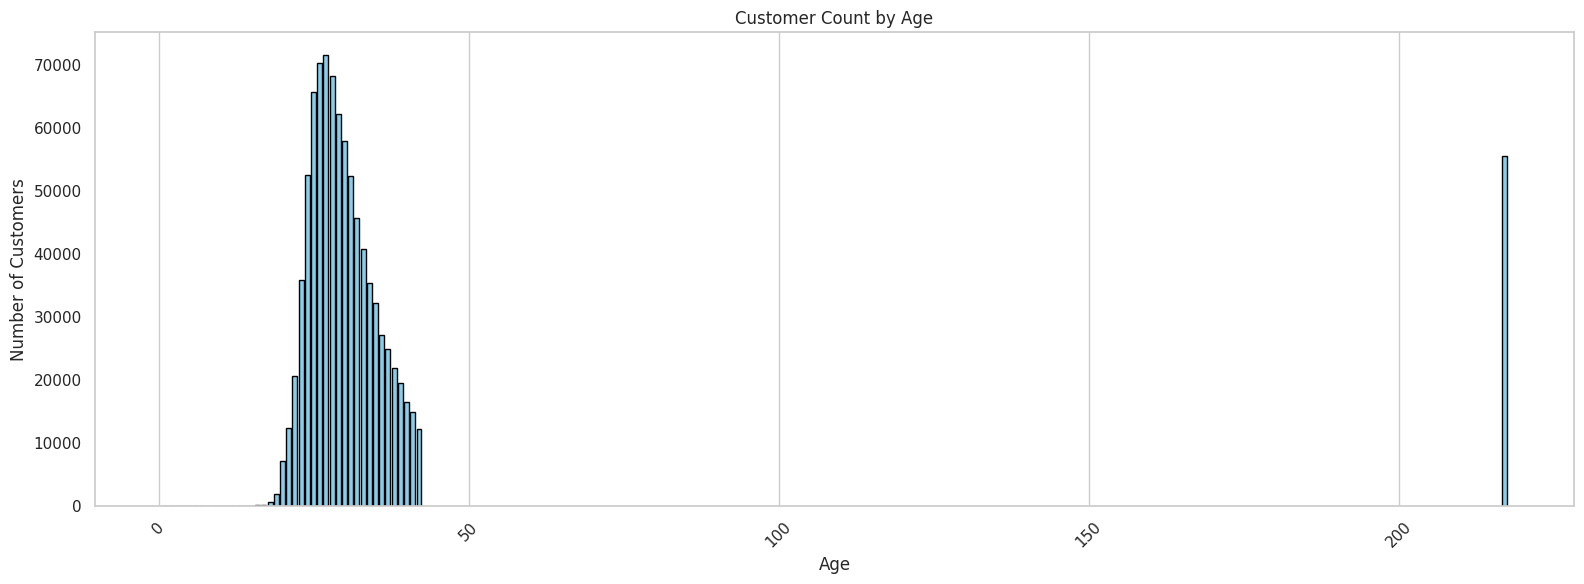

In [ ]:
plt.figure(figsize=(16, 6))
plt.bar(age_counts['Age'], age_counts['CustomerCount'], color='skyblue', edgecolor='black')
plt.title('Customer Count by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Get valid TransactionIDs with age between 18 and 100
valid_ids = age_df[(age_df['age'] >= 18) & (age_df['age'] <= 100)]['TransactionID'].tolist()


In [ ]:
# Filter original table to keep only valid age rows
query = f'''
    DELETE FROM Transactions
    WHERE TransactionID NOT IN ({','.join(f"'{id}'" for id in valid_ids)})
'''
conn.execute(query)
conn.commit()

In [ ]:
# CHECK IF DATA INSERTED INTO data/bank
df_Fact3 = pd.read_sql('SELECT * FROM Transactions', conn)
df_Fact3

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
2,4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
3,6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.0
4,7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.0
...,...,...,...,...,...,...,...,...,...,...
878970,1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
878971,1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
878972,1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
878973,1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
#This is new location cleanup
!pip install rapidfuzz
import pandas as pd
import re
from rapidfuzz import process, fuzz

# 1. Remove Non-Meaningful Values (Numbers Only)
df_Fact3 = df_Fact3[~df_Fact3['CustLocation'].str.match(r'^\d+$')]

# 2. Extract Meaningful Location Names (Remove Numbers)
df_Fact3.loc[:, 'CustLocation'] = df_Fact3['CustLocation'].apply(lambda x: re.sub(r'\d+', '', x).strip())

# 3. Standardize Spelling Mistakes Using Fuzzy Matching
unique_locations = df_Fact3['CustLocation'].unique().tolist()
standardized_locations = {}

for loc in unique_locations:
    result = process.extractOne(loc, unique_locations, scorer=fuzz.ratio)
    if result:  # Check if a result was found
        match, score, _ = result  # Unpack with '_' for the unused index
        if score > 85:  # 85% similarity threshold
            standardized_locations[loc] = match

df_Fact3.loc[:, 'CustLocation'] = df_Fact3['CustLocation'].map(standardized_locations)
df_Fact3 = df_Fact3.dropna(subset=['CustLocation'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.4 MB/s eta 0:00:00


In [ ]:
from geopy.geocoders import Nominatim
from functools import lru_cache

geolocator = Nominatim(user_agent="geo_cleaner")

@lru_cache(maxsize=10000)  # Cache up to 10,000 results
def validate_location(loc):
    try:
        place = geolocator.geocode(loc, timeout=10)
        return place.address if place else None
    except:
        return None

df_Fact3['CustLocation'] = df_Fact3['CustLocation'].astype(str)
df_Fact3['CustLocation'] = df_Fact3['CustLocation'].apply(validate_location)
df_Fact3 = df_Fact3.dropna(subset=['CustLocation'])


In [ ]:
df_Fact3.to_sql("Transactions",conn, if_exists='replace')

859044

In [ ]:
#Part 4
top_locations = pd.read_sql('''
    SELECT CustLocation, COUNT(*) AS transaction_count
    FROM Transactions
    GROUP BY CustLocation
    ORDER BY transaction_count DESC
    LIMIT 5
''', conn)

In [ ]:
top_locations

,CustLocation,transaction_count
0,"Mumbai Suburban, Maharashtra, India",86347
1,"Bengaluru, Bangalore North, Bengaluru Urban, K...",72752
2,"New Delhi, Foot Over Bridge 1, Ram Nagar, New ...",66211
3,"Gurugram, Haryana, India",62737
4,"Delhi, India",60448


In [ ]:

q2= pd.read_sql('''
    SELECT *
    FROM Transactions
''', conn)

In [ ]:
q2

,level_0,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,0,T1,C5841053,10/1/94,F,"Jamshedpur, Golmuri-Cum-Jugsalai, East Singhbh...",17819.05,2/8/16,143207,25.0
1,1,2,T3,C4417068,26/11/96,F,"Mumbai Suburban, Maharashtra, India",17874.44,2/8/16,142712,459.0
2,2,4,T5,C9031234,24/3/88,F,"Navi Mumbai, Thane Taluka, Thane, Maharashtra,...",6714.43,2/8/16,181156,1762.5
3,3,6,T7,C7126560,26/1/92,F,"Mumbai Suburban, Maharashtra, India",973.46,2/8/16,173806,566.0
4,4,7,T8,C1220223,27/1/82,M,"Mumbai Suburban, Maharashtra, India",95075.54,2/8/16,170537,148.0
...,...,...,...,...,...,...,...,...,...,...,...
859039,878970,1048562,T1048563,C8020229,8/4/90,M,"New Delhi, Foot Over Bridge 1, Ram Nagar, New ...",7635.19,18/9/16,184824,799.0
859040,878971,1048563,T1048564,C6459278,20/2/92,M,"Nashik, Nashik Taluka, Nashik, Maharashtra, 42...",27311.42,18/9/16,183734,460.0
859041,878972,1048564,T1048565,C6412354,18/5/89,M,"Hyderabad, Bahadurpura mandal, Hyderabad, Tela...",221757.06,18/9/16,183313,770.0
859042,878973,1048565,T1048566,C6420483,30/8/78,M,"Visakhapatnam, Visakhapatnam (Urban), Visakhap...",10117.87,18/9/16,184706,1000.0


In [ ]:
df_Fact3.dtypes

,0
index,int64
TransactionID,object
CustomerID,object
CustomerDOB,object
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,object
TransactionTime,int64
TransactionAmount (INR),float64


In [ ]:
df_Fact3['TransactionDate'] = pd.to_datetime(df_Fact3['TransactionDate'])
df_Fact3.dtypes

<ipython-input-42-abd5c2ceb8f1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact3['TransactionDate'] = pd.to_datetime(df_Fact3['TransactionDate'])


,0
index,int64
TransactionID,object
CustomerID,object
CustomerDOB,object
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,int64
TransactionAmount (INR),float64
